In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import re
from IPython.display import display, HTML

In [ ]:
df = pd.read_csv('/content/MalRadar_Dataset_info.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   website            4533 non-null   object
 1   url                4533 non-null   object
 2   report_date        4533 non-null   object
 3   report_family      4098 non-null   object
 4   created_on         4534 non-null   object
 5   tags               4534 non-null   object
 6   md5                4534 non-null   object
 7   sha1               4534 non-null   object
 8   sha256             4534 non-null   object
 9   app                4472 non-null   object
 10  package_name       4534 non-null   object
 11  company            4437 non-null   object
 12  displayed_version  4222 non-null   object
 13  size               4534 non-null   int64 
 14  AVClass_family     436 non-null    object
dtypes: int64(1), object(14)
memory usage: 531.5+ KB


In [ ]:
df.head()

,website,url,report_date,report_family,created_on,tags,md5,sha1,sha256,app,package_name,company,displayed_version,size,AVClass_family
0,https://blog.trendmicro.com/,https://www.trendmicro.com/en_us/research/16/b...,2016/02/10,LIBSKIN,2016-05-09 16:09:22,[],d1f4735838f3495c3945c10202e840b0,c9284224b4a6104debf065b34dce98582cd300ca,b3f5f626667f2c9b32e2548c8a8feac3d2e881720e1ead...,Assistive Touch,com.funme.assistivetouch,hzckgames,1.0,4334788,NaN
1,https://blog.trendmicro.com/,https://www.trendmicro.com/en_us/research/16/b...,2016/02/10,LIBSKIN,2015-11-25 22:58:58,[],320321c8609072aee639bc693d885805,2b9d11a79d71c1ccc17c79f05d5e7743df98e8de,bd634fc2beee4cb7e5e5191aa0dd6e5c9b207f177313f0...,Fast Search,com.ddlions.thunder,Android,1.0,5599895,NaN
2,https://blog.trendmicro.com/,https://www.trendmicro.com/en_us/research/16/b...,2016/02/10,LIBSKIN,2015-12-26 02:23:53,['rooting'],c17c2364d239ad52d13b8873dc9cf978,22547b544c19a6a254e24363abeaf7d917b8afc2,e6c0bab8680141117b506df273278f60be721426977aa7...,Wifi Booster,com.smart.booster.wifi,Android,5.0,2642031,NaN
3,https://blog.trendmicro.com/,https://www.trendmicro.com/en_us/research/16/b...,2016/02/10,LIBSKIN,2015-12-31 19:50:47,[],3933b93cdcb72e9738593708c1cff2c6,54771a09c83138bafe20e457aee042a8a991b443,f02eea20264ae3d8d10ab378bf3a2ba04961e9212ef02f...,Freedom,com.baghaaer.freedom,Freedom,2.9.2,1401317,NaN
4,https://blog.trendmicro.com/,https://www.trendmicro.com/en_us/research/16/b...,2016/02/10,LIBSKIN,2018-04-01 16:42:54,[],d6f3a038909da8fe371a9c8084603751,f10625159f35423509e8ea6ab11ec27f8591cea0,2b46cba1e5bae12feaa537af790682f74cdad025a79fb6...,Game Killer,com.cordiona.Gamekiller,Game_Killer,2.70,1321006,NaN


In [ ]:
for col in ['report_date', 'created_on']:
  if col in df.columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
print("Missing Values Summary:")
missing_summary = df.isnull().sum().sort_values(ascending=False)
display(missing_summary)

Missing Values Summary:


,0
AVClass_family,4098
report_family,436
displayed_version,312
company,97
app,62
url,1
website,1
report_date,1
md5,0
created_on,0


In [ ]:
display(df.describe())

,report_date,created_on,size
count,4533,4534,4.534000e+03
mean,2018-02-25 05:31:57.935142400,2017-12-25 01:14:49.595279872,6.378330e+06
min,2014-01-21 00:00:00,2014-11-08 00:19:28,1.682700e+04
25%,2017-06-13 00:00:00,2016-10-15 09:52:32.500000,5.651840e+05
50%,2018-01-03 00:00:00,2018-02-05 21:40:21,2.858776e+06
75%,2019-04-02 00:00:00,2019-01-19 10:04:14.249999872,7.556869e+06
max,2021-04-19 00:00:00,2021-04-12 10:49:44,9.131403e+07
std,NaN,NaN,1.025096e+07


Text(0, 0.5, 'Count')

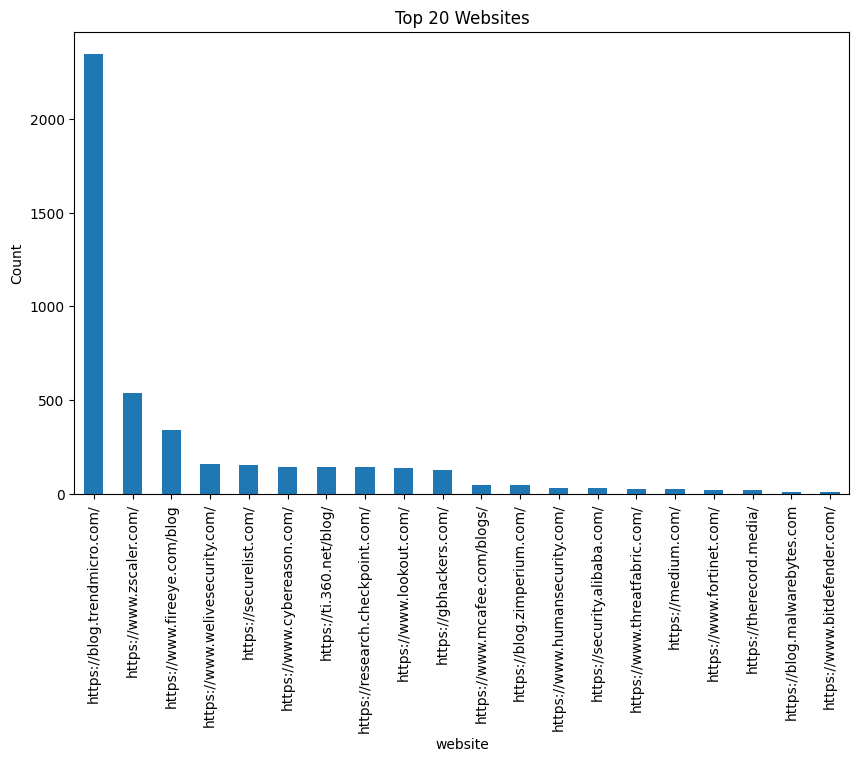

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df['website'].value_counts().head(20).plot(kind='bar', ax=ax)
ax.set_title('Top 20 Websites')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

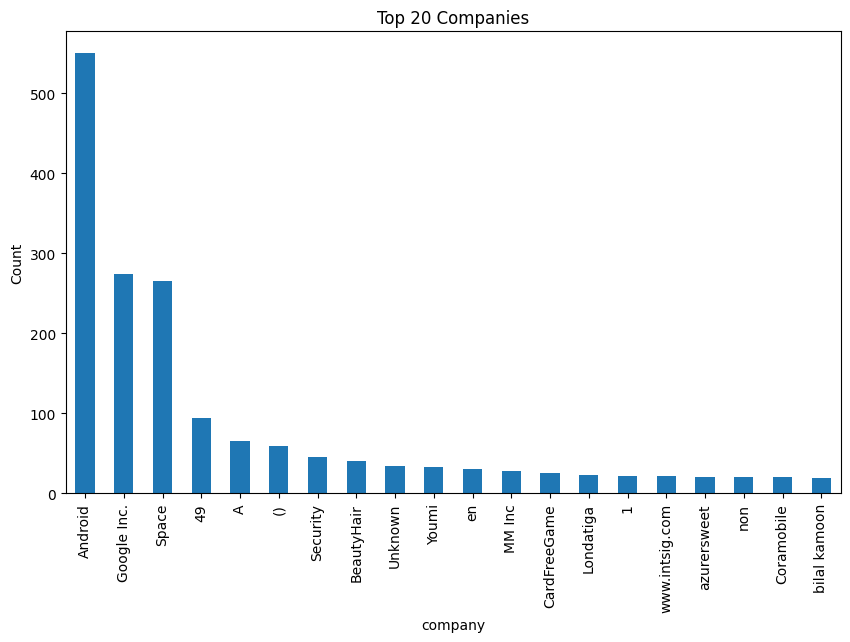

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df['company'].value_counts().head(20).plot(kind='bar', ax=ax)
ax.set_title('Top 20 Companies')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

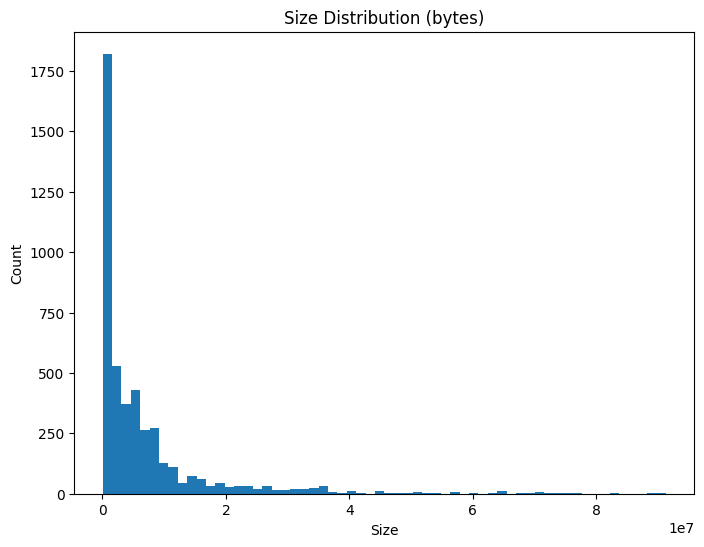

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df['size'].dropna(), bins=60)
ax.set_title('Size Distribution (bytes)')
ax.set_xlabel('Size')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

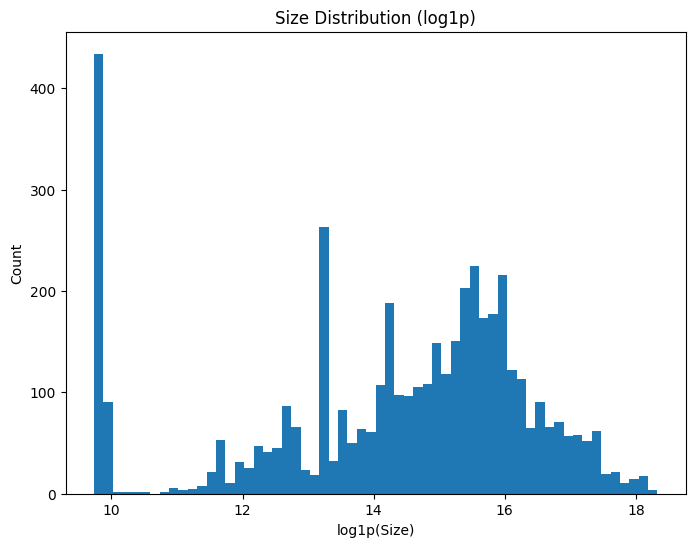

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(np.log1p(df['size'].dropna()), bins=60)
ax.set_title('Size Distribution (log1p)')
ax.set_xlabel('log1p(Size)')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

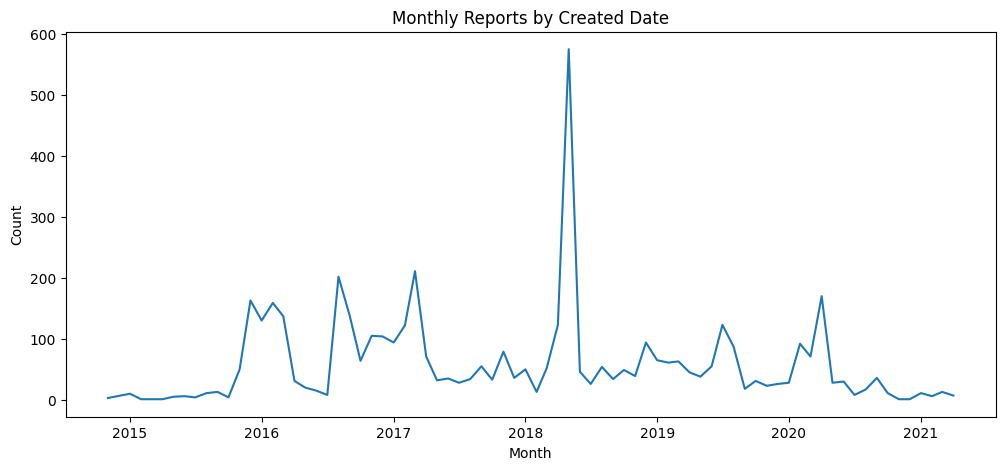

In [ ]:
ts = df['created_on'].dropna().dt.to_period('M').value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ts.index.to_timestamp(), ts.values)
ax.set_title('Monthly Reports by Created Date')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

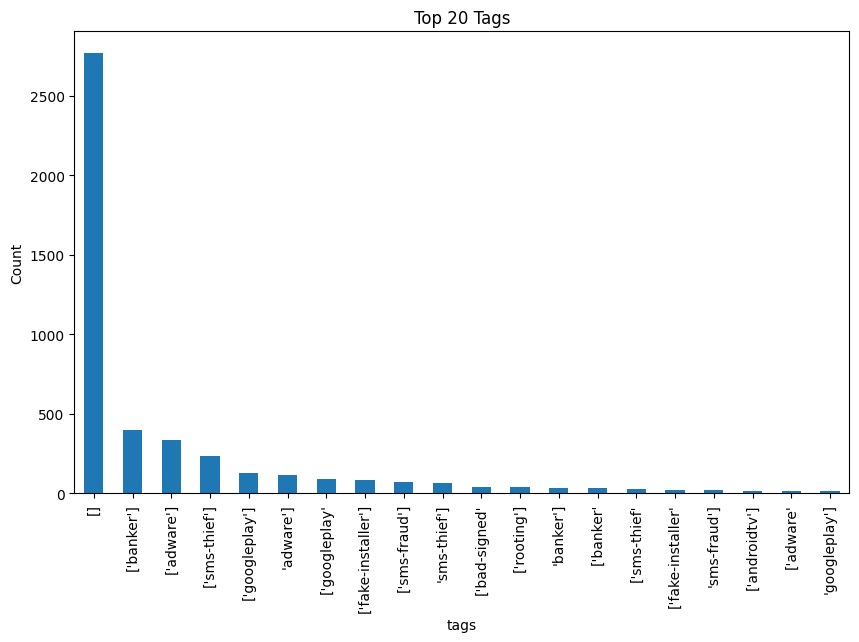

In [ ]:
tags = df['tags'].dropna().astype(str)
tags_split = tags.apply(lambda x: re.split('[,;|]+', x)).explode().str.strip().str.lower()
tags_split = tags_split[tags_split != '']
top_tags = tags_split.value_counts().head(20)
fig, ax = plt.subplots(figsize=(10,6))
top_tags.plot(kind='bar', ax=ax)
ax.set_title('Top 20 Tags')
ax.set_ylabel('Count')

Text(0, 0.5, 'Rows (sampled)')

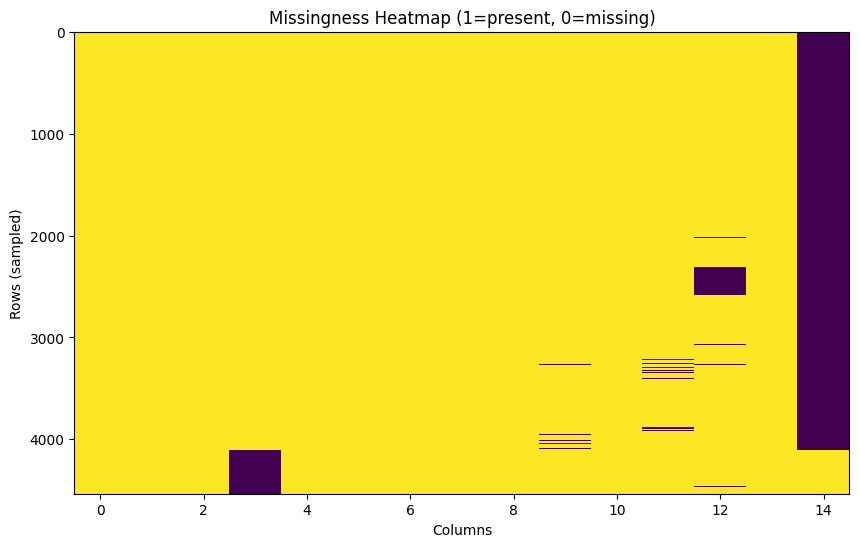

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(~df.isnull(), aspect='auto', interpolation='nearest')
ax.set_title('Missingness Heatmap (1=present, 0=missing)')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows (sampled)')

In [ ]:
df['AVClass_family'].unique()

array([nan, 'solid', 'ewind', 'hiddad',
       'SINGLETON:10e13149570da422f392c5689867a84b',
       'SINGLETON:59264bdba99b8e3772ca91571dd8ab46', 'HiddenAd',
       'allinone', 'boogr', 'SINGLETON:5b6abc3b722d40ee337c576cf3040171',
       'SINGLETON:5009d3f2ca3a183c4f2811a1a5e9a24f',
       'SINGLETON:7b5fb7fa764202871bb253f6f493f838',
       'SINGLETON:4d1528df393560cbcd4722e022a12de8',
       'SINGLETON:1eb065762aaf2e074dabbc74d873bd73',
       'SINGLETON:d54321db192deed3cdef325ae7349456',
       'SINGLETON:f15c2c2fccd49eff7127ebe012174d24',
       'SINGLETON:02f6de8eb57655e3fb98d1d9789dc4a6', 'piom',
       'SINGLETON:94337f21e8eeaae410d2d6999622f17d',
       'SINGLETON:4ec4abce599976e76fc2aa25a29c0347',
       'SINGLETON:37541f29d38f170b9dc136dffc3ea2b4',
       'SINGLETON:5258ce23cc8f7796060721640f992cb3',
       'SINGLETON:96bf0208206c36c9d5a74b2c450a4d77', 'avazu', 'mazarbot',
       'SINGLETON:6eb92667ebbbcb2c7ddf6230462222fd', 'razam', 'fobus',
       'Hqwar', 'smsthief', 'ace